# Numerical calculations for "Origins of Cosmological Temperature"

This SageMath notebook performs numerical calculations for the paper *Origins of Cosmological Temperature* and the supplemental note *Calculations for "Origins of Cosmological Temperature"*.

It makes graphs of the two anharmonic potentials and does some arithmetic.

Section headings are as in the supplemental note.


## 3.5 Action in dimensionless variables

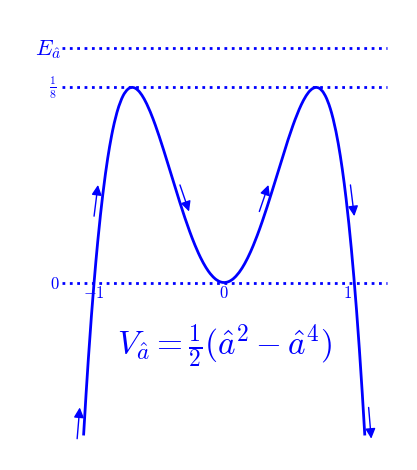

In [1]:
ah = var('ah')
E_ah = 0.15
ah_lim=1.08
ah_plot=plot((1/2)*(ah^2-ah^4), (ah,-ah_lim,ah_lim),aspect_ratio=12)
ah_plot+=text(r'$E_{\hat{a}}$', (-1.35,E_ah),fontsize=8)
ah_plot+=text(r'$0$',(-1.3,0),fontsize=6)
ah_plot+=text(r'$\frac{1}{8}$',(-1.32,0.125),fontsize=6,aspect_ratio=1)
ah_plot+=text(r'$0$',(0,-0.006),fontsize=6,aspect_ratio=1)
ah_plot+=text(r'$1$',(0.95,-0.006),fontsize=6,aspect_ratio=1)
ah_plot+=text(r'$-1$',(-1.0,-0.006),fontsize=6,aspect_ratio=1)
ah_plot+=text(r'$V_{\hat{a}}=\frac{1}{2}(\hat{a}^2-\hat{a}^4)$',(0,-0.04),fontsize=12)
ah_plot+= plot(0.125,(ah,-1.25,1.25),linestyle=":")
ah_plot+= plot(0,(ah,-1.25,1.25),linestyle=":")
ah_plot+= plot(E_ah,(ah,-1.25,1.25),linestyle=":")
ah_plot+=arrow((1.11,-0.08),(1.13,-0.08-.02),width=.5,arrowsize=1.5)
ah_plot+=arrow((-1.13,-0.08-.02),(-1.11,-0.08),width=.5,arrowsize=1.5)
ah_plot+=arrow((0.97,1/16),(1.00,1/16-.02),width=.5,arrowsize=1.5)
ah_plot+=arrow((-1.00,1/16-.02),(-0.97,1/16),width=.5,arrowsize=1.5)
ah_plot+=arrow((-.34,1/16),(-.27,1/16-.017),width=.5,arrowsize=1.5)
ah_plot+=arrow((.27,1/16-.017),(.34,1/16),width=.5,arrowsize=1.5)
ah_plot.save('plot_ah.pdf',dpi=200,axes=False)
show(ah_plot,axes=False,dpi=200,figsize=[3.2,2.4])

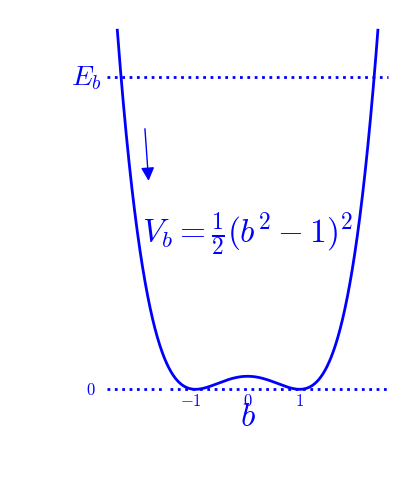

In [2]:
b = var('b')
E_b = 12
b_plot=plot((1/2)*(b^2-1)^2, (b,-2.5,2.5),aspect_ratio=.5)
b_plot+=text(r'$E_b$',(-3.1,E_b),fontsize=10)
b_plot+=text(r'$0$',(-3.0,0),fontsize=6)
b_plot+=text(r'$V_b=\frac{1}{2}(b^2-1)^2$',(0,E_b/2),fontsize=12)
b_plot+=text(r'$b$',(0,-1),fontsize=12)
b_plot+= plot(0,(b,-2.7,2.7),linestyle=":")
b_plot+= plot(E_b,(b,-2.7,2.7),linestyle=":")
b_plot+=text(r'$1$',(1.0,-0.4),fontsize=6)
b_plot+=text(r'$0$',(0.0,-0.4),fontsize=6)
b_plot+=text(r'$-1$',(-1.09,-0.4),fontsize=6)
b_plot+=arrow((-1.97,E_b-2),(-1.9,E_b-4),width=.5,arrowsize=2)
b_plot.save('plot_b.pdf',dpi=200,axes=False)
show(b_plot,axes=False,dpi=200,figsize=[3.2,2.4])

## 5.1 Fundamental constants

In [3]:
%display latex
LE = lambda latex_string: LatexExpr(latex_string);

declare units as variables

In [4]:
s = var('s', domain='positive'); assume(s,'real');
GeV = var('GeV', domain='positive'); assume(GeV,'real');
J = var('J', domain='positive'); assume(J,'real');
m = var('m', domain='positive'); assume(m,'real');
meters = var('meters', domain='positive'); assume(meters,'real');
kg = var('kg', domain='positive'); assume(kg,'real');
K = var('K', domain='positive'); assume(K,'real');
C = var('C', domain='positive'); assume(C,'real');

fundamental constents from NIST 2018

In [5]:
c = 299792458 * meters * s^(-1);
e_charge = 1.602176634  * 10^(-19) * C;
hbar = 1.054571817*10^(-34)*J*s;
kB = 1.380649*10^(-23)*J*K^(-1);
G = 6.67430*10^(-11)*m^3*kg^(-1)* s^(-2);
kappa = N(8*pi)*G;
#
pretty_print(LE(r"c ="),c);
pretty_print(LE(r"e ="),e_charge);
pretty_print(LE(r"\hbar ="),hbar);
pretty_print(LE(r"k_{B} ="),kB);
pretty_print(LE(r"G ="),G);
pretty_print(LE(r"\kappa ="),kappa);

c = 299792458*meters/s

e = (1.60217663400000e-19)*C

\hbar = (1.05457181700000e-34)*J*s

k_{B} = (1.38064900000000e-23)*J/K

G = (6.67430000000000e-11)*m^3/(kg*s^2)

\kappa = (1.67743454782835e-9)*m^3/(kg*s^2)

use c=1 units with unit of energy = GeV

In [6]:
m = c^(-1)*meters;
J = e_charge^(-1) * C * 10^(-9) * GeV
kg = J*s^2*m^(-2)
def conv(*args):
    return [arg.subs(m=m,kg=kg,J=J) for arg in args]
[hbar,kB,G,kappa] = conv(hbar,kB,G,kappa)
pretty_print(LE(r"\hbar ="),hbar);
pretty_print(LE(r"k_{B} ="),kB);
pretty_print(LE(r"G ="),G);
pretty_print(LE(r"\kappa ="),kappa);

\hbar = (6.58211956547607e-25)*GeV*s

k_{B} = (8.61733326214518e-14)*GeV/K

G = (4.41583261432942e-63)*s/GeV

\kappa = (1.10981978405276e-61)*s/GeV

## 5.2 Standard Model coupling constants from PDG (2018, 2019)

In [7]:
GFermi =  1.1663787*10^(-5)*GeV^(-2);
mW = 80.379*GeV;
mH = 125.10*GeV;
#
pretty_print(LE(r"G_F ="),GFermi);
pretty_print(LE(r"m_W ="),mW);
pretty_print(LE(r"m_H ="),mH);

G_F = 0.0000116637870000000/GeV^2

m_W = 80.3790000000000*GeV

m_H = 125.100000000000*GeV

In [8]:
hbar_v = N(2^(-1/4))*GFermi^(-1/2)
pretty_print(LE(r"\hbar v  = 2^{-1/4} G_F^{-1/2}="),hbar_v)
v = hbar_v/hbar
pretty_print(LE(r"v ^{-1} ="),1/v);
g = 2*mW/hbar_v;
pretty_print(LE(r"g = \frac{2 m_W}{\hbar v }="),g)
lambdaH = mH/hbar_v;
pretty_print(LE(r"\lambda = \frac{m_H}{\hbar v }="),lambdaH)

\hbar v  = 2^{-1/4} G_F^{-1/2}= 246.219650794137*GeV

v ^{-1} = (2.67327142421274e-27)*s

g = \frac{2 m_W}{\hbar v }= 0.652904833068782

\lambda = \frac{m_H}{\hbar v }= 0.508082923505546

## 5.3 Gravitational and weak time scales $t_{\mathrm{grav}}$, $t_{\mathrm{W}}$

In [9]:
tgrav = sqrt(kappa*hbar);
pretty_print(LE(r"t_{\mathrm{grav}} = (\hbar\kappa)^{1/2}=\
(8\pi)^{1/2} t_{P}="),N((8*pi)^(1/2)),LE(r"t_{P}\\="),tgrav)

t_{\mathrm{grav}} = (\hbar\kappa)^{1/2}=(8\pi)^{1/2} t_{P}= 5.01325654926200 t_{P}\\= (2.70277015574135e-43)*s

In [10]:
tW = hbar/mW;
pretty_print(LE(r"t_{\mathrm{W}}=\frac{\hbar}{m_W}="),tW)

t_{\mathrm{W}}=\frac{\hbar}{m_W}= (8.18885475743176e-27)*s

## 5.4 The scalar field energy density $\mathcal{E}_{0}$

In [11]:
E0 = hbar*lambdaH^2*v^4/8;
ratio1 = tW^4*E0/hbar;
pretty_print(LE(r"\frac{1}{\hbar}\mathcal{E}_{0}="),\
             ratio1,LE(r"\: t_{\mathrm{W}}^{-4}"))

\frac{1}{\hbar}\mathcal{E}_{0}= 2.84118595562545 \: t_{\mathrm{W}}^{-4}

## 5.5 Seesaw time scale $t_{I}$

In [12]:
tI = (3/(kappa*E0))^(1/2);
ratio2 = tI*tgrav/tW^2;
pretty_print(LE(r"t_{I}="),
             ratio2,LE(r"\:\frac{t_{\mathrm{W}}^{2}}{t_{\mathrm{grav}}}"),\
            LE(r"="),tI)

t_{I}= 1.02756853595816 \:\frac{t_{\mathrm{W}}^{2}}{t_{\mathrm{grav}}} = (2.54945892615748e-10)*s

In [13]:
ratio12 = N(sqrt(3/2))*g^2/lambdaH;
pretty_print(LE(r"\sqrt{\frac32}\frac{g^2}{\lambda}="),ratio12);

\sqrt{\frac32}\frac{g^2}{\lambda}= 1.02756853595816

In [14]:
tI*c;
pretty_print(LE(r"t_{I} c="),tI*c);

t_{I} c= 0.0764308558042792*meters

## 5.6 Seesaw ratio $\epsilon_W$

In [15]:
epsilonW = (kappa*hbar/(2*g^2*tI^2))^(1/4);
pretty_print(LE(r"\epsilon_{W}="),epsilonW)

\epsilon_{W}= 3.38842679174089e-17

In [16]:
ratio3 = epsilonW*tW/tgrav;
ratio4 = epsilonW*tI/tW;
ratio34 = sqrt(ratio3*ratio4);
pretty_print(LE(r"\epsilon_{W}="),ratio34,
             LE(r"\:\left(\frac{t_{\mathrm{grav}}}{t_{I}}\right)^{1/2}"))
pretty_print(LE(r"\epsilon_{W}="),ratio3,
             LE(r"\:\frac{t_{\mathrm{grav}}}{t_{\mathrm{W}}}"))
pretty_print(LE(r"\epsilon_{W}="),ratio4,
             LE(r"\:\frac{t_{\mathrm{W}}}{t_{I}}"))

\epsilon_{W}= 1.04068084127939 \:\left(\frac{t_{\mathrm{grav}}}{t_{I}}\right)^{1/2}

\epsilon_{W}= 1.02662576744880 \:\frac{t_{\mathrm{grav}}}{t_{\mathrm{W}}}

\epsilon_{W}= 1.05492833683428 \:\frac{t_{\mathrm{W}}}{t_{I}}

In [17]:

ratio134=(2*g^2)^(-1/4);
pretty_print(LE(r"\left(\frac{1}{2g^2}\right)^{1/4}="),ratio134)

\left(\frac{1}{2g^2}\right)^{1/4}= 1.04068084127939

In [18]:
ratio13=(lambdaH^2/(3*g^6))^(1/4);
pretty_print(LE(r"\left(\frac{\lambda^2}{3g^6}\right)^{1/4}="),ratio13)

\left(\frac{\lambda^2}{3g^6}\right)^{1/4}= 1.02662576744880

In [19]:
ratio14=((3*g^2)/(4*lambdaH^2))^(1/4);
pretty_print(LE(r"\left(\frac{3g^2}{4\lambda^2}\right)^{1/4}="),ratio14)

\left(\frac{3g^2}{4\lambda^2}\right)^{1/4}= 1.05492833683428

## 5.7 Units of action for the two oscillators

In [20]:
ratio5=6*N(pi)^2/g^2;
pretty_print(LE(r"\frac{6\pi^{2}}{g^2}="),ratio5)

\frac{6\pi^{2}}{g^2}= 138.915667118982

## 7.5 $K(1/\sqrt{2})$

In [21]:
K = N(gamma(1/4)^2/(4*pi^(1/2)));
pretty_print(LE(r"K(1/\sqrt{2}) = \frac{\Gamma(1/4)^{2}}{4 \pi^{1/2}}="),K)

K(1/\sqrt{2}) = \frac{\Gamma(1/4)^{2}}{4 \pi^{1/2}}= 1.85407467730137

## 7.6 $\langle \mathrm{cn}^2 \rangle$ for $k=1/\sqrt2$

In [22]:
cn2ave = N(pi/2)/K^2;
pretty_print(LE(r"\langle \mathrm{cn}^2 \rangle=\frac{2}{\pi^{2}}\frac{1}{K^{2}}="),cn2ave)

\langle \mathrm{cn}^2 \rangle=\frac{2}{\pi^{2}}\frac{1}{K^{2}}= 0.456946581044464

## 8. Cosmological temperature

In [23]:
kT = mH/N((6*pi)^(1/2));
pretty_print(LE(r"k_B T ="),kT)

k_B T = 28.8142120659094*GeV

In [24]:
pretty_print(LE(r"T ="),kT/kB) 

T = 3.34375046077032e14*K

## 9.1 Solution for $\hat a$ in co-moving time

In [25]:
pretty_print(LE(r"\frac{\epsilon_W}{\sqrt{2}} ="),epsilonW/N(sqrt(2))) 

\frac{\epsilon_W}{\sqrt{2}} = 2.39597956199416e-17

## 9.2 $\hat a_{\mathrm{EW}}$

In [26]:
ratio6 =N(3^(1/2)*pi/(8*K^2))*(2*mW/mH);
pretty_print(LE(r"\hat a^2_{\mathrm{EW}} ="),\
             LE(r"\frac{3^{1/2}\pi}{8 K^2}\frac{2m_W}{m_H}(2 E_{\hat a})^{1/2}="),\
             ratio6,LE(r"\:(2 E_{\hat a})^{1/2}"))

\hat a^2_{\mathrm{EW}} = \frac{3^{1/2}\pi}{8 K^2}\frac{2m_W}{m_H}(2 E_{\hat a})^{1/2}= 0.254261938075174 \:(2 E_{\hat a})^{1/2}

In [27]:
pretty_print(LE(r"\hat a_{\mathrm{EW}} ="),\
             sqrt(ratio6),\
            LE(r"\:(2 E_{\hat a})^{1/4}"))

\hat a_{\mathrm{EW}} = 0.504243927157457 \:(2 E_{\hat a})^{1/4}

In [28]:
thatEW = asinh(ratio6)/2;
pretty_print(LE(r"\hat t_{\mathrm{EW}} ="),thatEW)

\hat t_{\mathrm{EW}} = 0.125799532989201

In [29]:
tEW = thatEW * tI;
pretty_print(LE(r"t_{\mathrm{EW}} ="),tEW)

t_{\mathrm{EW}} = (3.20720742285761e-11)*s

In [30]:
TEW = inverse_jacobi('cn', e^(-thatEW), 0.5);
pretty_print(LE(r"T_{\mathrm{EW}} ="),TEW,LE(r"\;\epsilon_a"))

T_{\mathrm{EW}} = 0.501068706214232 \;\epsilon_a